# Chapter 3 Sets and Maps

## 3.1 Sets 

### 3.1.1 The Set Abstract Data Type
**Set ADT**<br>
* **A set is a container that stores a collection of uniuqe values over a given comparable doamin in which the stored values have no particular ordering**
* Set(): **create a new set initialized to the empty set**
* length(): **returns the number of elements in the set, also known as the cardinality. Accessed using the** len() **function**
* contains(element): **determines if the given value is an element of the set and returns the appropriate boolean value. Accessed using the** in **operator**
* add( element ): **modifies the set by adding the given value or element to the set if the element in not already a member. If the element is not unique, no action is taken and the operation is skipped.**
* remove( element ): **removes the given value from the set if the value is contained in the set adn raises an exception otherwise
* equals( set B ): **determines if the set is equal to another set and returns a boolean value. For two sets, A and B, to be equal, both A and B must contain the same number of elements and all elements in A must also be elements in B. If both sets are empty, the sets are equal. Access with == or !=.**
* isSubsetOf( setB ): **determines if the set is a subset of another set and returns a boolean value. For set A to be a subset of B, all elements in A must also be elements in B.**
* union( setB ): **creates and returns a new set that is the union of this set and** setB. **Yje set created from the union of two sets, A and B, contains all elements in A plus those elements in B that are not in A. Neither set A or set B is modified by this operation.**
* intersect( setB ): **creates and returns a new set that is the intersection of this set and setB. The intersection of sets A and B contains only those elements that are both A and B. Neither set A nor set B is modified by this operation.**
* difference( setB ): **creates and returns a new set that is the difference of this set and** setB. **The set difference,** A-B, **contains only those elements that are in A but not B. Neither set A nor set B is modified by this operation.**
* iterator(): **creates and returns an iterator that can be used to iterate over the collection of items.**

### 3.1.2 Selecting a Data Structure
1. **Since the list can grow as needed,it seems ideal for storing the elements of a set just as it was for the bag and it does provide for the complete functionality.**
1. **Since the list allows for duplicate values, we must make sure as part of the implementation that no duplicates are added to the set.**

### 3.1.3 List-Based Implementation
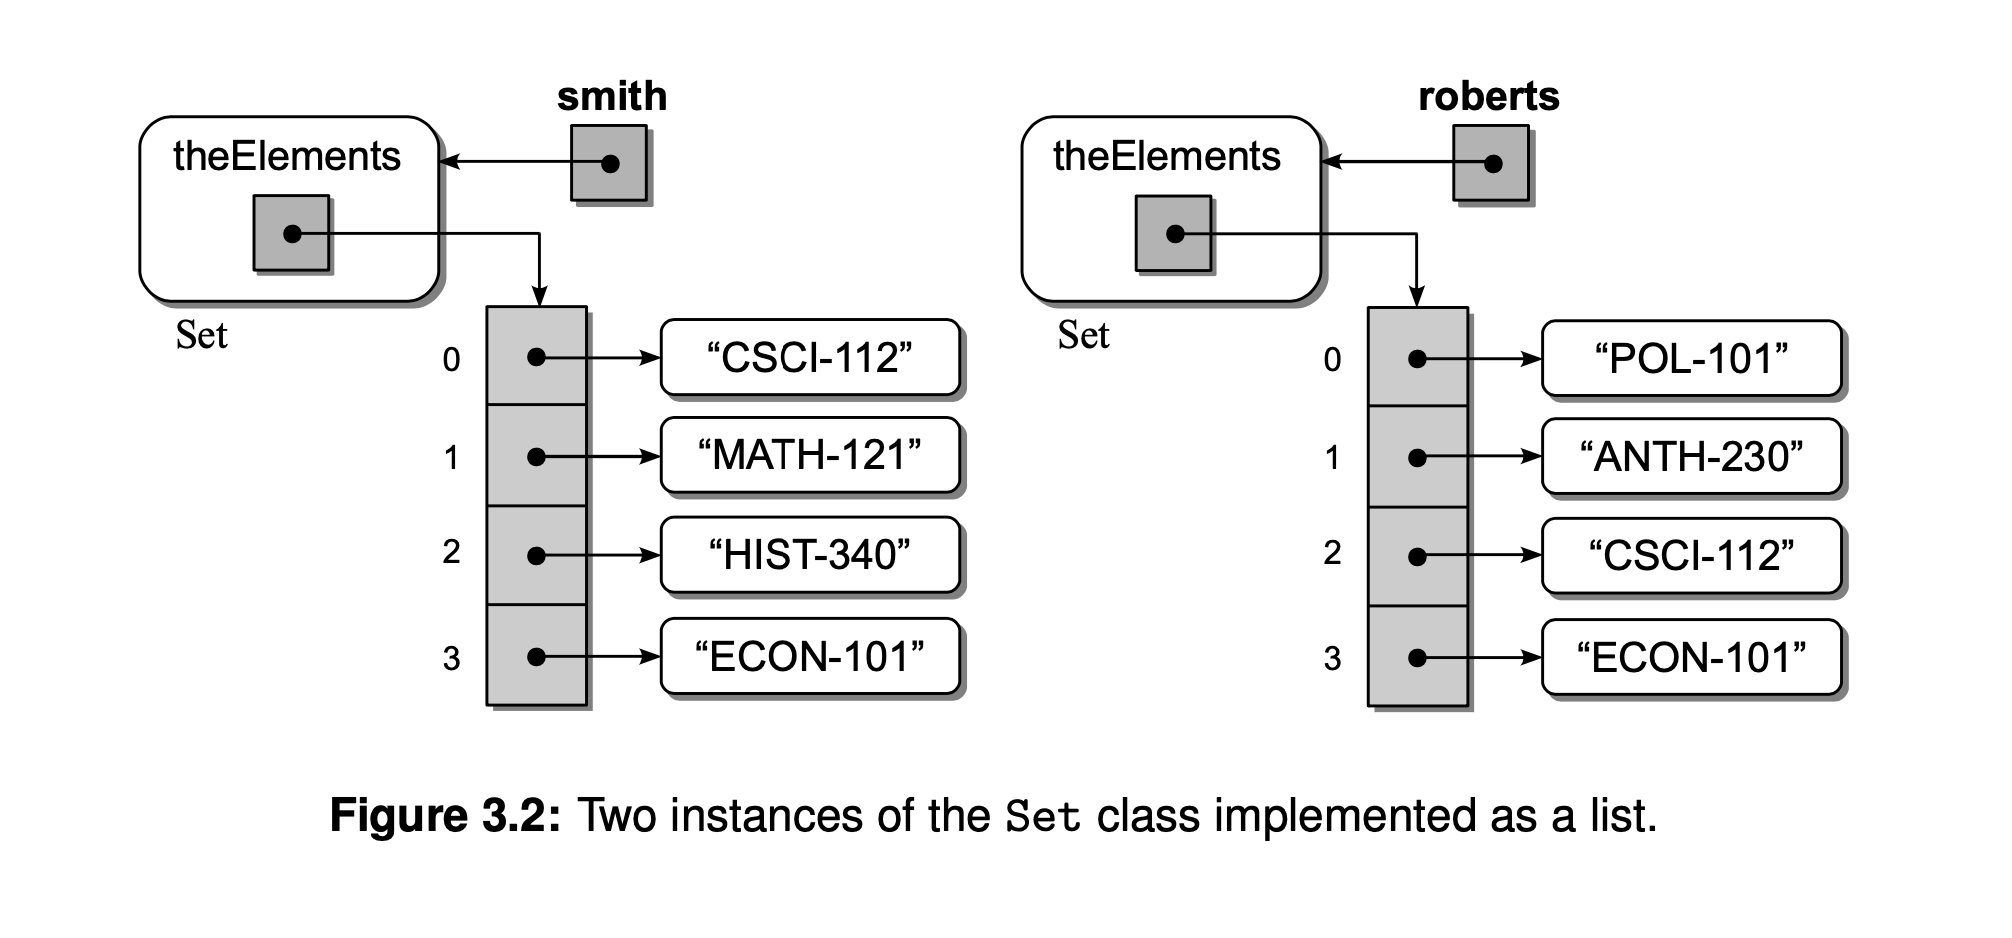

#### Adding Elements
* **When implemeneting the add method, we must first determine if the supplied** element **is already in the list or not. If the** element **is a duplicate, we can simply append the value to the end of the list; if the element is a duplicate, we do nothing**

#### Comparing Two Sets
* **We first check if the two sets contain the same number of elements; otherwise, they cannot be equal. After verifying the size of the lists, we can test to see if the** self **set is a subset of** setB **by calling** self.isSubsetOf(setB).

#### The Set Union
1. **Creare a new set**
1. **Fill the new set with the elemnets from set B.**
1. **Iterate through the elements of the self set, during which each element is addes to the new set if that element is not in set B.**

In [3]:
#implmentation of the set ADT container using a Python list
class set:
    # creates an empty set instance
    def __init__(self):
        self._theElements = list()
        
    # returns the number of items in the list
    def __len__(self):
        return len(self._theElements)
    
    # determins if an element is in the set
    def __contains__( self, element ):
        return element in self._theElements
    
    # add new unique element to the set
    def add( self, element ):
        if element not in self:
            self._theElements.append( element )
    
    # remove an element from the set
    def remove( self, element ):
        assert element in self._theElements, "The element must be in the set"
        self._theElements.remove(element)
        
    #determines if two sets are equal
    def __eq__(self, setB ):
        if len(self) == len(setB):
            return False
        else: 
            return self.isSubsetOf(setB)
    
    # determines if this set is a subset of setB
    def isSubsetOf( self, setB ):
        for element in self:
            if element not in setB:
                return False
        return True
    
    #creates a new set from the union of this set and setB
    def union( self, setB ):
        newSet = Set()
        newSet._theElements.extend(self._theElements)
        for element in setB:
            if element not in self:
                newSet._theElements.append( element )
        return newSet
    
    

## 3.2 Maps

### 3.2.1 The Map Abstract Data Type
**Map ADT**<br>
* map( ): **creates a new empty map.**
* length( ): **returns the number of key/value pairs in the map.**
* contains(key): **determines if the given key is in the map and returns** True **if the key is found and** Fasle **otherwise**
* add( key, value): **adds a new key/value pair to the map if the key is not already in the map or replaces the data associated with the key if the key is in the map. Returns True if this is a new key and False if the data is associated with the existing key is replaced.**
* valueOf( key ): **returns the data record associated with the given  key. The key must exist in the map or an exception is raised.**
* iterator( ): **creates and returns an iterator that can be used to iterate over the keys in the map.**

### 3.2.2 List-Based Implementation
* **instead of using two lists to store the key/value entries in the map, we can use a single list. The individual keys and corresponding values can both be saved in a single object, with that object then stored in a list.**
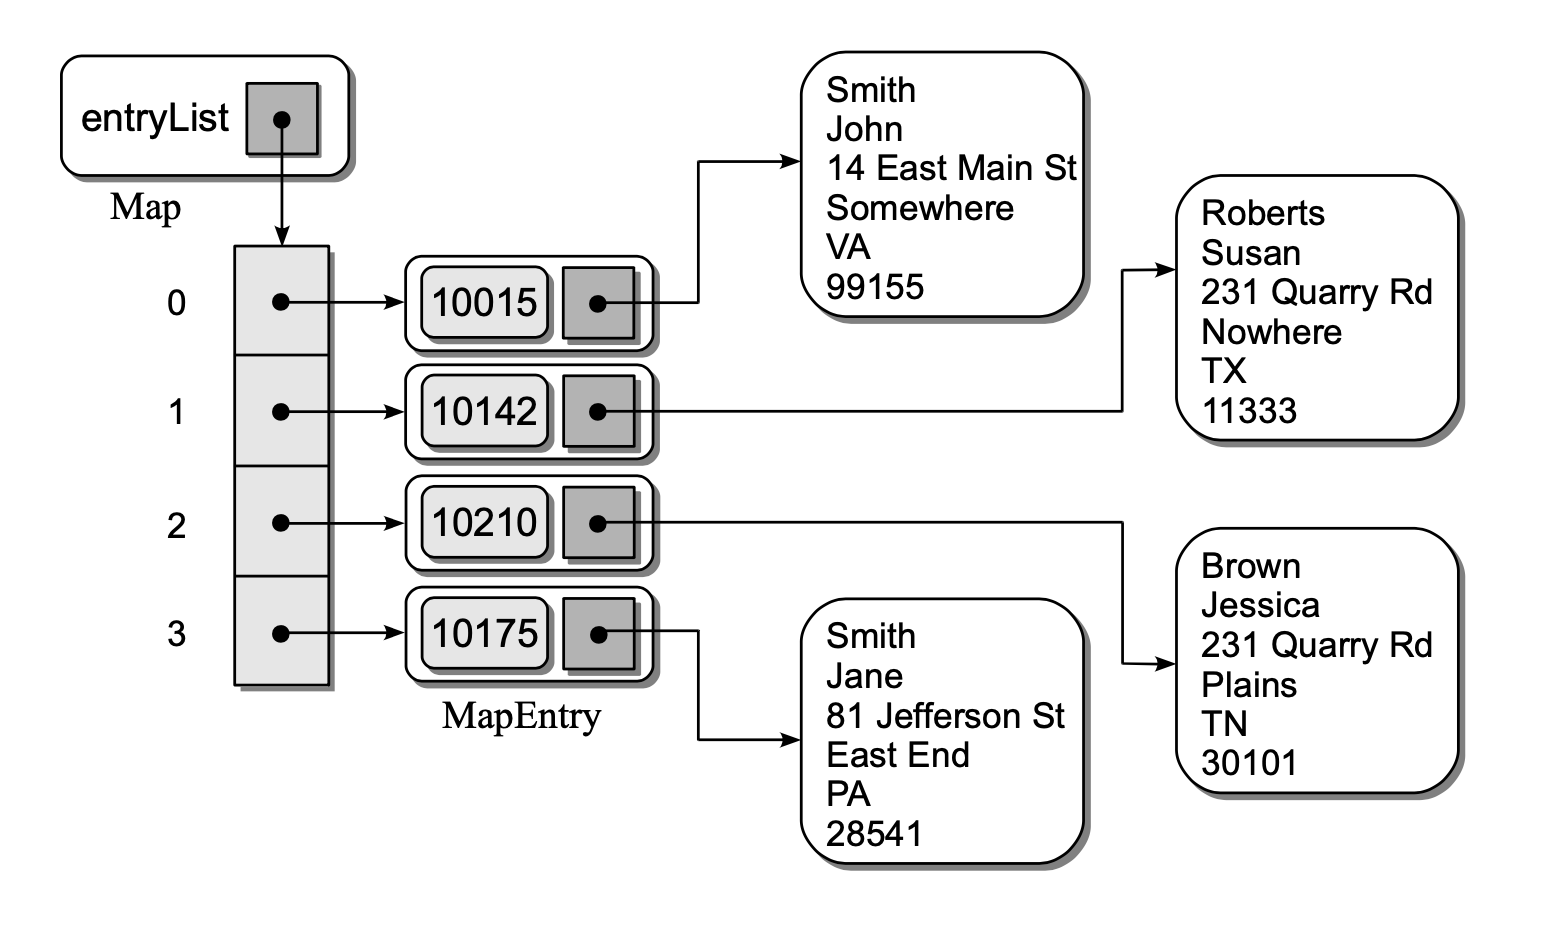

* **The standard** in **operator cannot be used since the list contains** \_MapEntry **objects and not simply key entries. Instead, we have to search the list ourselves and examine the** key **field of each** \_MapEntry **object.**
* **The** \_findPosition( ) **helper method searches the list for the given key. If the key is found, the index of its location is returned; otherwise, the function returns None to indicate the key is not contained in the map**

In [2]:
# storage class for holding the key/value pairs
class _MapEntry:
    def __init__( self, key, value ):
        self.key = key
        self.value = value

#Implementation of Map ADT using a single list
class Map:
    #creates an empty map instance
    def __init__(self):
        self._entryList = list()
        
    #returns the number of entries in the map
    def __len__(self):
        return len(self._entryList)
    
    #determines if the map contains the given key
    def __contains__(self, key):
        ndx = self._findPosition(key)
        return ndx is not None
    
    # new value replaces the current value associated with the key
    def add( self, key, value ):
        ndx = self._findPostion( key )
        if ndx is not None: #if the key was found
            self._entryList[ndx].value = value
            return False
        else: 
            entry = _MapEntry( key, value )
            self._entryList.append(entry)
            return True
        
    #returns the value associated with the key
    def valueOf( self, key ):
            ndx = self._findPosition( key )
            assert ndx is not None, "Invalid map key"
            return self._entryList[key].value
        
    #removes the entry associated with the key
    def remove( self, key ):
        ndx = self._findPosition()
        assert ndx is not None, "invalid map key"
        self._entryList.pop(nsx)
        
    # returns an iterator for traversing the keys in the map
    def __iter__(self):
        return _MapIterator( self._entryList )
    
    #Helper method used to find the index position of a category. 
    #if the key is not found, None is returned.
    def _findPosition( self, key ):
        # Iterate through each entry in the list
        for i in range( len(self) ):
            #is the key stored in the ith entry?
            if self._entryList[i].key == key :
                return i
            #when not found, return None
        return None

## 3.3 Multi-Dimensional Arrays
***A multi-dimensional array* stores a collection of data in which the individual elements are accessed with multi-component subscripts:** $x_{i,j} ,y_{i,j,k} $

### 3.3.1 The MultiArray Abstract Data Type
**MultiArray ADT**<br>
* **A multi-dimensional array consists of a collection of elements organized into multiple dimensions. Individual elements are referenced by specifying an n-tuple or a subscript of multiple components, $( i_1, i_2, \dots, i_n)$, one for each dimension of the array**
* MultiArray($d_1, d_2, \dots, d_n$): **creates a multi-dimensional array of elements organized *n*-dimensions with each element initially set to** None. **The number of dimensions, which is specified by the number of arguments, must be greater than 1. The individual arguments, all of which must be greater than zero, indicate the lengths of the correspnding array dimensions. The dimensions are specified from the highest to lowest, where** $d_1$ **is the highest possible dimension and $d_n$ is the lowest.**
* dims( ): **returns the number of dimensions in the multi-dimensional array.**
* length( dim): **returns the length of the given array dimension. The individual dimensions are numbered starting from 1, wehere 1 represents the firstm or highest, dimension possible in the array.**
* clear( value ): **clears the array by setting each element to the given** value.
* getitem($i_1, i_2, \dots, i_n$): **returns the value stored in the arra at the element position indicated by the n-tuple** $(i_1,i_2,\dots,i_n)$. **All of the specified indices must be given and they must be within the valid range of the corresponding array dimensions.Accessed using the element operator.**
* setitem($i_1, i_2,\dots, i_n, value$): **modifies the contents of the specified element to contain the given vakye, The element is specified by the n-tuple $ (i_1, i_2, \dots, i_n)$. All of the subscript components must be given and they must be within the valid range of the corresponding array dimensions.**

### 3.3.2 Data Organization
* **In most programming languages, a multi-dimensional array is actually created and stored in memory as a one-dimensional array. With this organization, a multi-dimensional rray is simply an abstract view of a physical one-dimensional data structure.**

#### Array Storage
* **row-major order: the individual rows are stored sequentially, one at a time.**
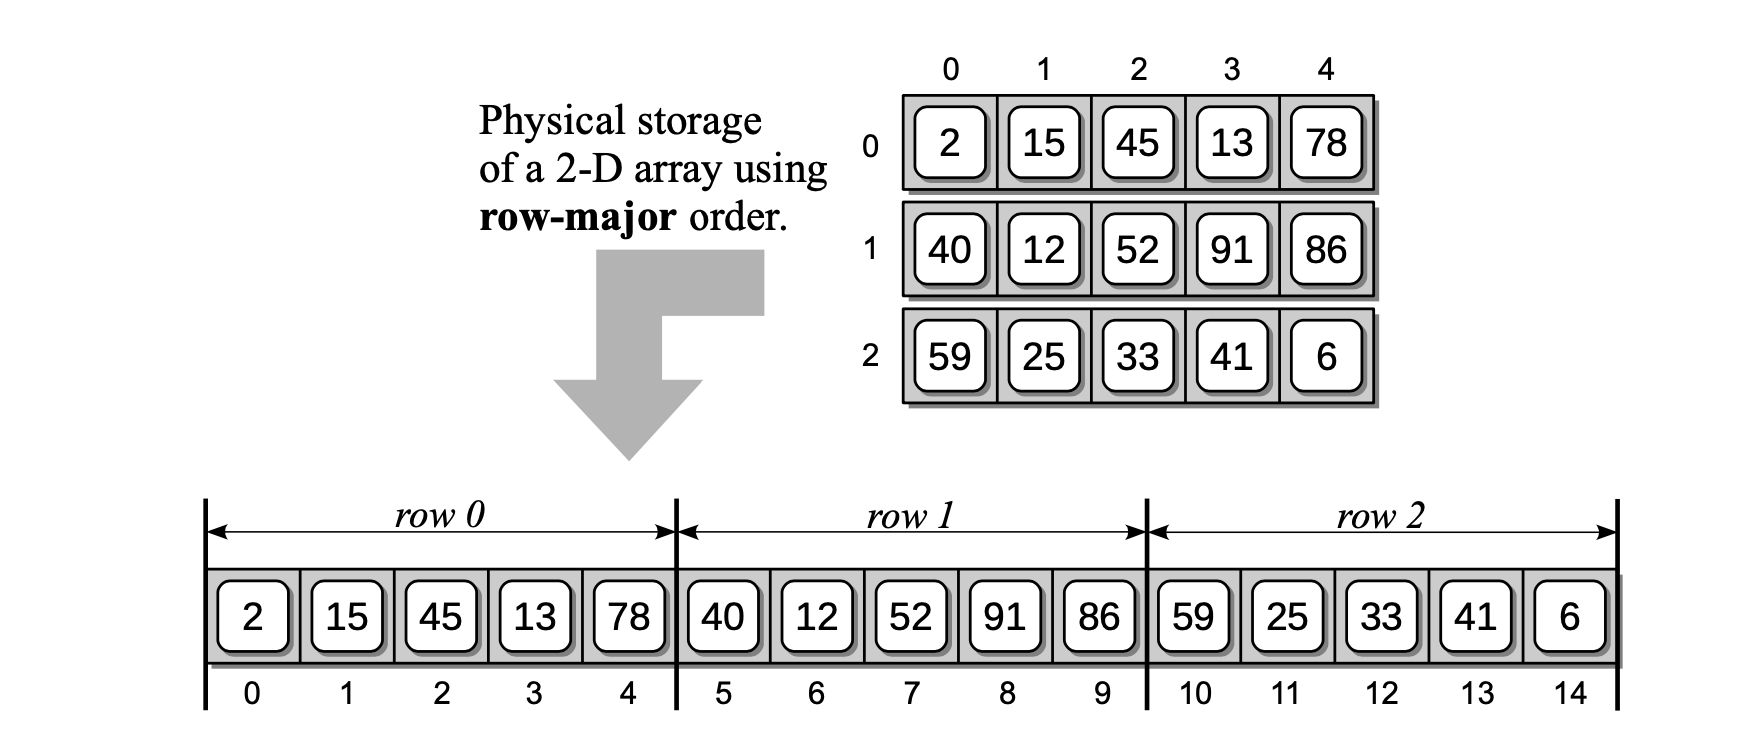
* **column-major orderL the 2-D array is stored sequentially, one entire colummn at a time.**
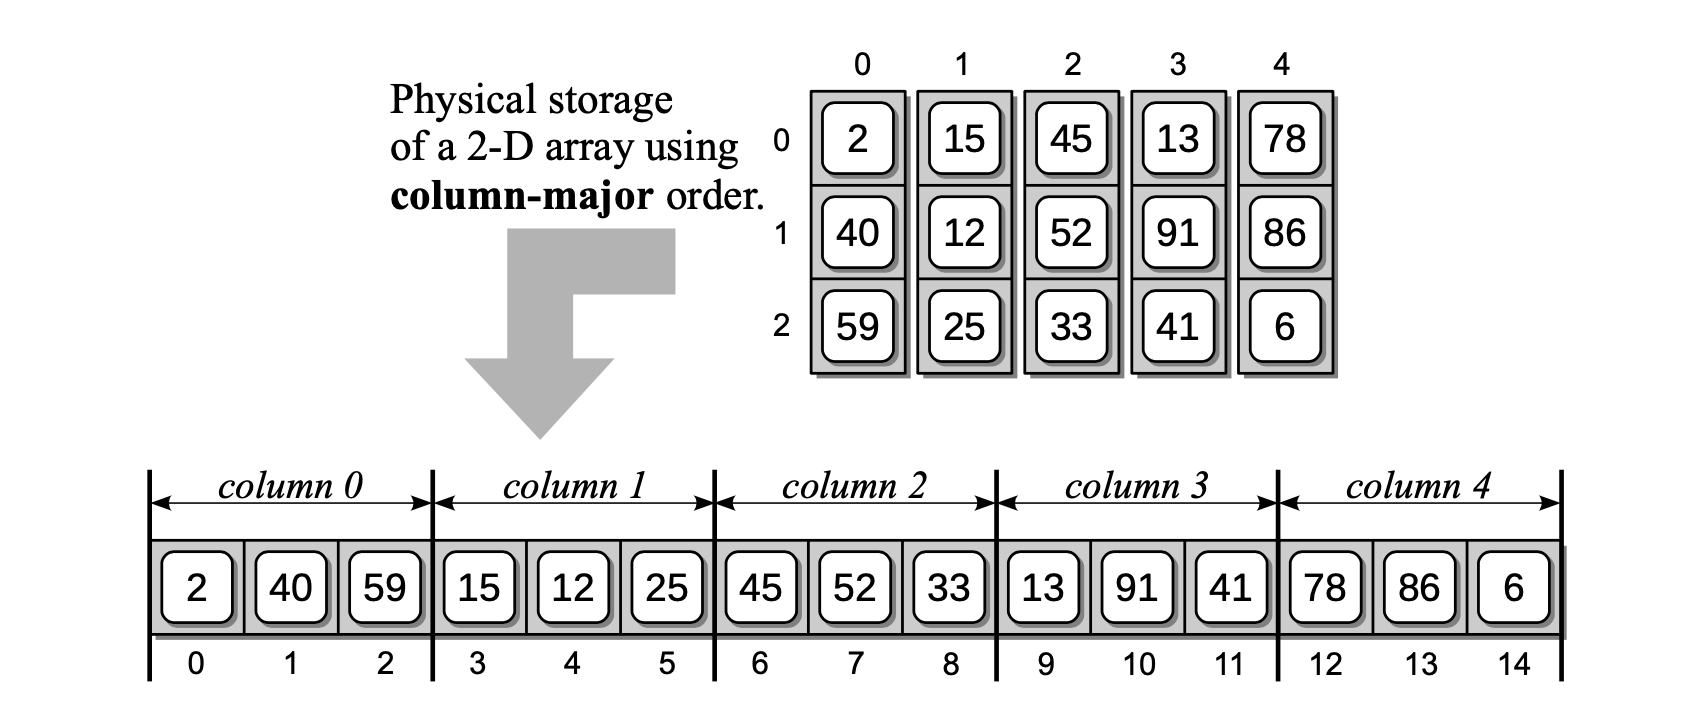
* **With a three-dimensional array, the individual tables can be stored contiguously using either row-major or column-major ordering. As the number of dimensions grow, all elements within a single instacne of each dimensionare stored contiguously before the next instance.**

#### Index Computation
* **Knowing the position of the first element of each row, the position for any element within a 2-D array can be determined.Given an elemnet $(i, j)$ of a 2-D array, the storage location of that element in the 1-D array is computed as
$$ index_2(i, j) = i * n + j $$
The column index, $ j$, is not only the offset within the given row but also the number of elements that must bbe skipped in the *i*th row to reach the *j*th column**
* **General equation for computing the 1-D array offset for element $(i_1, i_2, \dots,i_n)$ within an *n*-dimensional array:
$$ index (i_1,i_2, \dots, i_n) = i_1 * f_1 +i_2*f_2+\dots+i_{n-1}*f_{n-1}+i_n * 1$$
where the $f_j$ values are the factors representing the number of elements to be skipped within the corresponding dimension and are computed using**
$$ f_n =1\space \textit{and}\space f_j = \prod_{k = j+1}^{n} d_k \forall 0 < j < n$$


### 3.3.3 Variable Length Arguments
* **Following function accepts any number of arguments(assumed to be numerical) and then prints how many arguments were passed and the sum of those arguments**

In [7]:
def func( *args ):
    print (f"Number of arguments: {len(args)}")
    sum = 0
    for value in args:
        sum += value
    print("sum of the arguments: ", sum)

In [6]:
func(1, 2, 3)

Number of arguments: , 3
sum of the arguments:  6


* **The asterisk next to the argument name (\*args) tells python to accept any number of arguments and to combine them into a tuple**
* **The** len( ) **operation can be applied to the tuple to determine the number of actual arguments passed to the function.**
* **The individual arguments, which are elements in the tuple, can be accessed by using the subscript notation or by iterating the collection.**

### 3.3.4 Implementing the MultiArray

#### Constructor
* \_dims **stores the sizes of the individual dimensions;** \_factors **stores the factor values used in the index equation;** \_elements **is used to store the 1-D array used as the physical storage for multi-dimensional array.**
* **Th sizes of the individual dimensions are assigned to the** \_dims **field. The dimensionality of the array must be verified at the beginning of the constructor as the MultiArray ADT is meant for use with arrays of two dimensions or more.**
* **The fixed size of the array can be computed as the product of the dimension lengths by traversing over the tupple containing the variable-length argument. During the traversal, the precondition requiring all dimension lengths be greater than zero is evaluated.**

#### Dimensionality and Lengths
* length() **method first verifies the given dimension index is between 1 and n. The size of the requested dimension is then returned using the appropriate value form the** \_dims **tuple.**
* numDims() **method returns the dimensionalit of the array, which can be obtained from the number of elemnets in the** \_dims **tuple**

#### Element Access
* **Access to individual elements within an *n*-D arays requires an *n*-tuple or multi-component subscript, one for each dimension.**
* **The contents of the** ndxTuple **are passed to the** \_computeIndex( ) **helper method to compute the index offset within the 1-D storage array.**

#### Computing the Offset
* **The method verify the subscript components are within legal range of the dimension lengths. If they are valid, the offset is computed and returned; otherwise,** None **is returned to flag an invalid array index**

In [14]:
# Implementation of the MultiArray ADT using a 1-D array
class MultiArray:
    # Creates a multi-dimensional array
    def __init__(self, *dimensions):
        assert len(dimensions) > 1, "the array must have 2 or more dimensions"
        # The variable argument tuple contains the dim sizes
        self._dims = dimensions
        # compute the total nunber of elements in the array
        size = 1
        for d in dimensions:
            assert d > 0, "Dimensions must be > 0"
            size *= d
            
        # create the 1-D array to store the elements
        self._elements = Array( size )
        #Create a 1-D array to store the equation factors
        self._factors = Array( len(dimensions) )
        sel
            
    # returns the number of dimensions in the array
    def numDims(self):
        return len(self._dims)
    
    # returns the length of the given dimension
    def length(self, dim):
        assert len(dim) > 1 and len(dim < len(self._dims)), "Dimension component out of range"
        return self._dims[dim - 1]
    
    # clears the array by setting all elements to the given value
    def clear( self, value ):
        self._elements.clear(value)
        
    # returns the contents of element
    def __getitem__(self, ndxTuple):
        assert len(ndxTuple) == self.numDims(), "Invaliud # of array subscripts"
        index = self._computeIndex( ndxTuple )
        assert index is not None, "Array subscript out of range"
        return self._elements[index]
    
    def __setitem__(self, ndxTuple, value):
        assert len(ndxTuple) == self.numDims(), "invlaid # of array subscropts"
        index = self._computeIndex(ndxTuple)
        assert index is not None, "Array subscript out of range"
        self._elements[index] = value
    
    # computes the 1-D array offset 
    def _computeIndex(self, idx):
        offset = 0
        for j in range(len(idx)):
            # make sure the index components are within legal range
            if idx[j] < 0 or idx[j] >= self._dims[j]:
                return None
            else: 
                offset += idx[j] * self._factors[j]
        return offset


## 3.4 Application: Sales Reports
* **Each sales data consists of four pieces of information:**
1. **The store number**
1. **The month number**
1. **The item number**
1. **The sales amount for the given item in the given store during the given month**

### Data Organization
* **The 3-D array can be viewe as a collection of spreadsheets. Each spreadsheet contains the sales for a specific store and is divided into rows and columns where each row contains the sales for onetime and the column contain the sales for each month.**

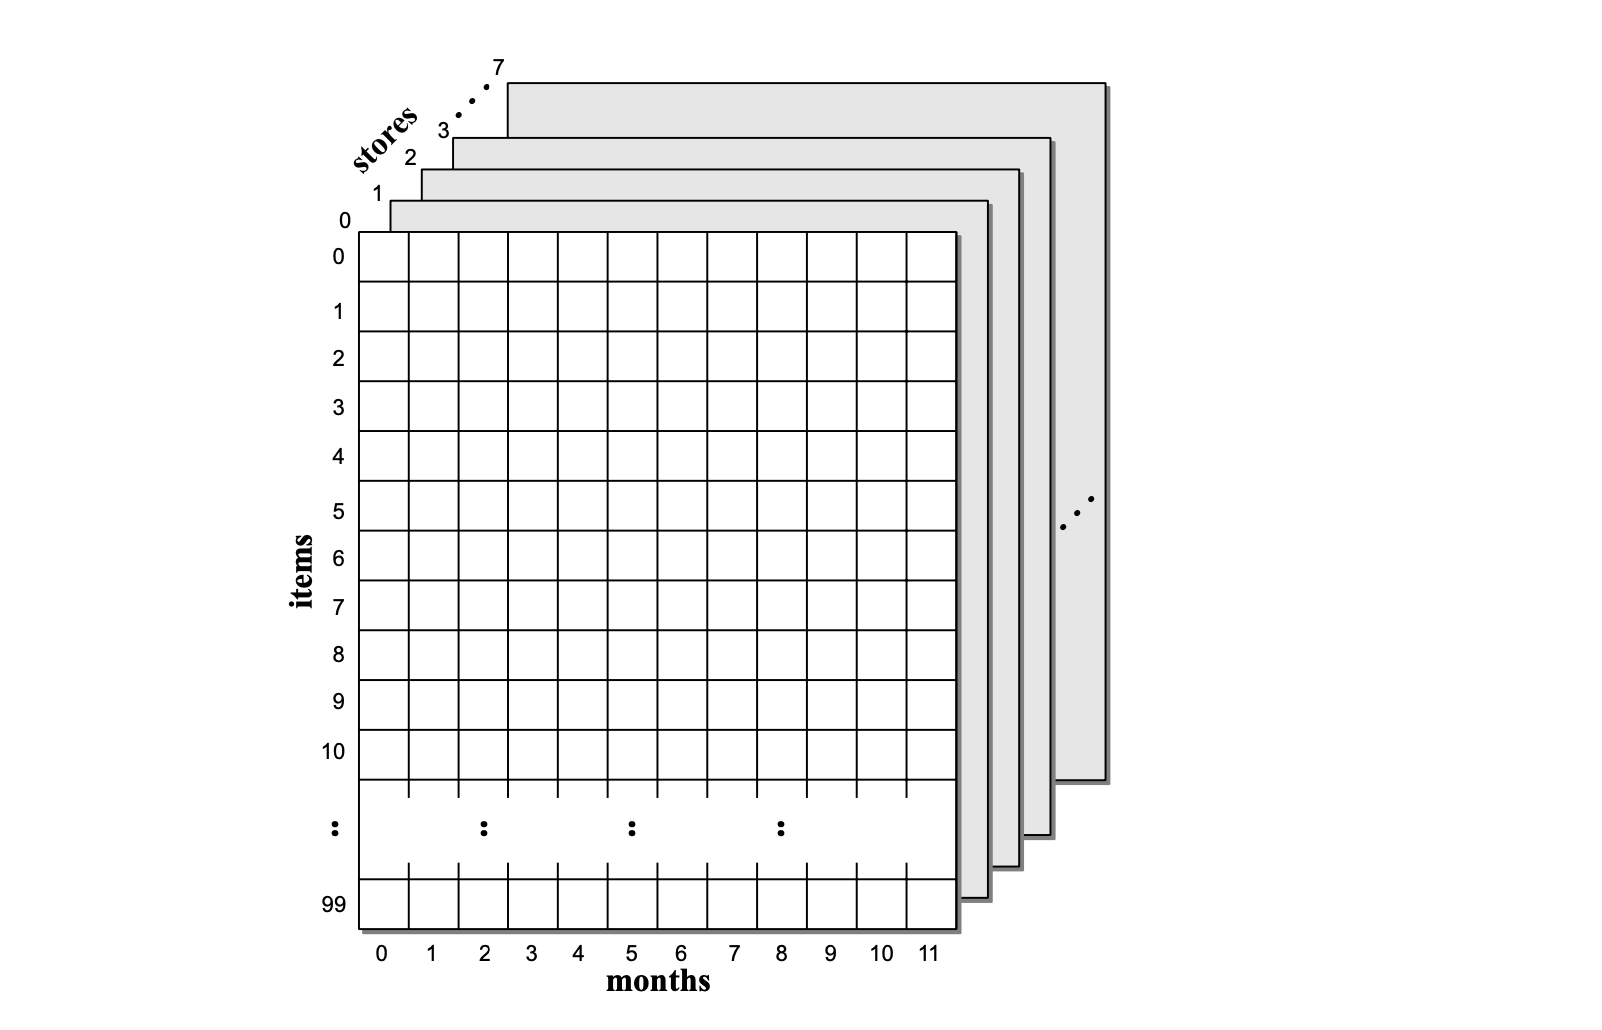



#### Total Sales by Store
* **This requires traversimh over every element in the spreadsheet containing the data for the given** store.
* **Two nested loops are required since we must sum the values from each row and column contained in the given** store **spreadsheet.**

In [ ]:
# Compute the total sales of all item for all months in a given store
def totalSalesByStore(salesData, store):
    # Subtract 1 from the store # since the array indices are 1 less
    # than the given store
    s = store - 1
    # Accumulate the total sales for the given store
    total = 0.0
    
    # iterate over item
    for i in range( salesData.length(2)):
        # Iterate over each month of the i item
        for m in range(salesData.length(3)):
            total += salesData[s, i, m]
            
    return total

#### Total Sales by Month
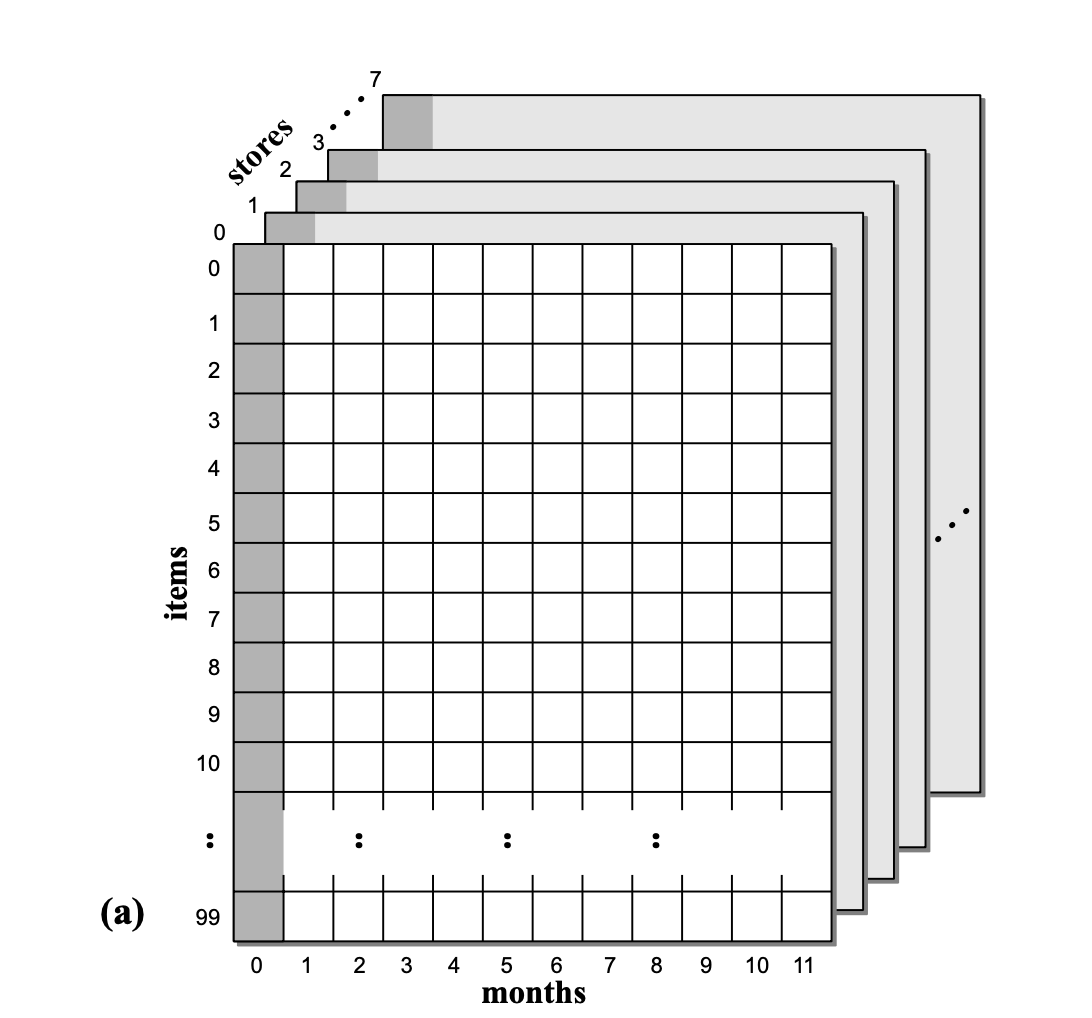

In [15]:
# compute the total sales of all items in all stores for a given month
def totalSalesByMonth(salesData, month):
    # The month number must be offset by 1
    m = month - 1
    # Accumulate the total sales for the given month
    total = 0.0
    
    # Iterate over each store
    for s in range(salesData.length(1)):
        # Iterate over each item of the s store
        for i in range(salesData.length(2)):
            total += salesData[s, i, m]
            
    return total

#### Total Sales by Item

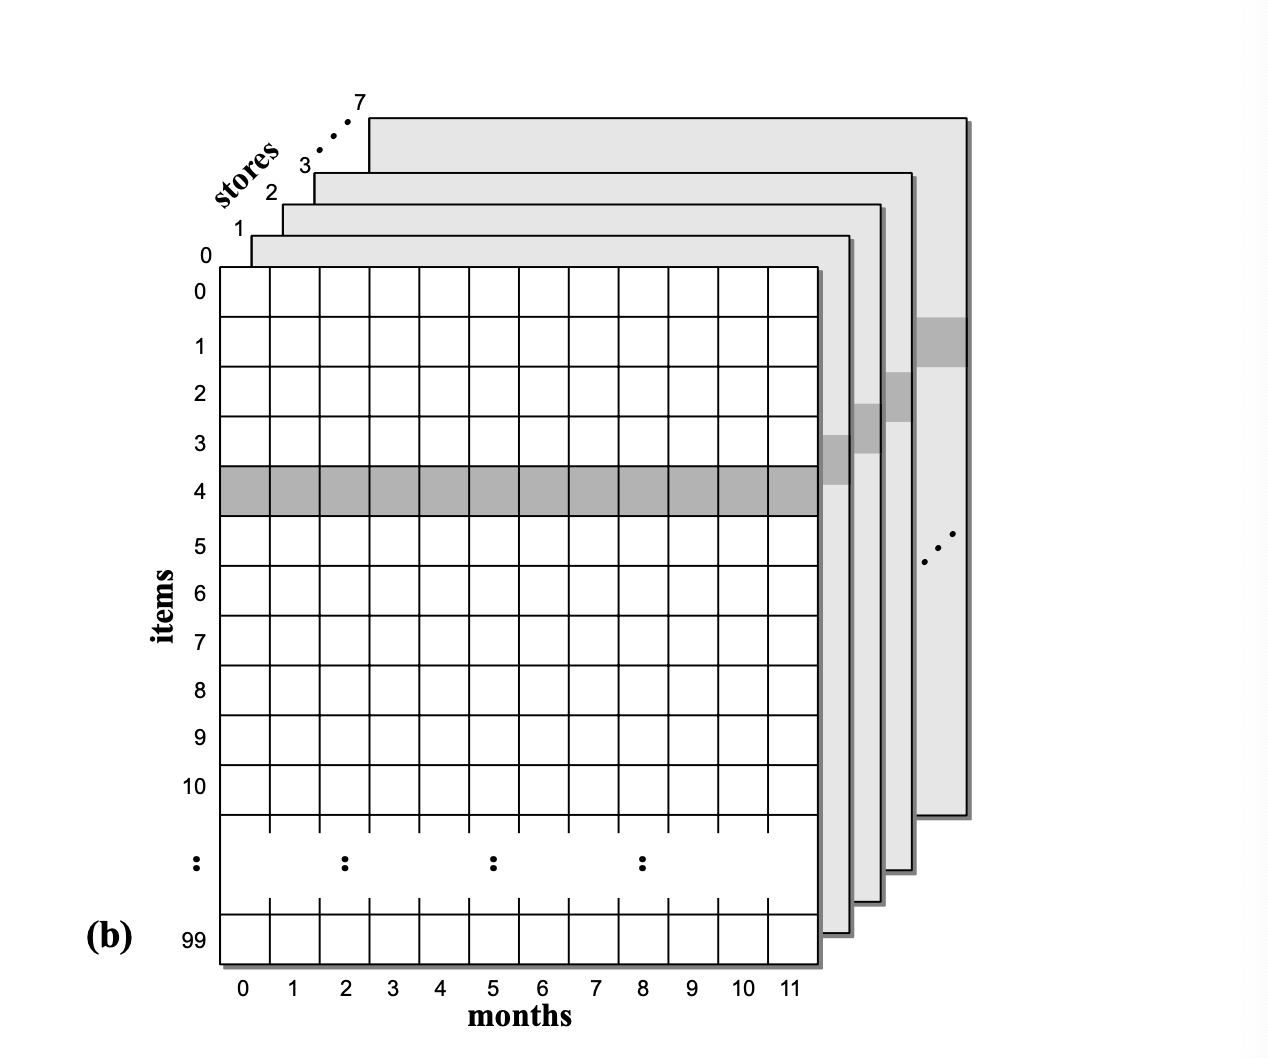

In [16]:
# compute the total sales of a single item in all stores over all months
def totalSalesByItem(salesData, item):
    # The item number must be offset by 1
    m = item - 1
    
    # Accumulate the total sales for the given month
    total = 0.0
    
    # Iterate over each store
    for s in range(salesData.length(1)):
        # Iterate over each month of the s sotre
        for m in range(salesData.length(3)):
            total += salesData[s, i, m]
            
    return total

#### Monthly Sales by Store
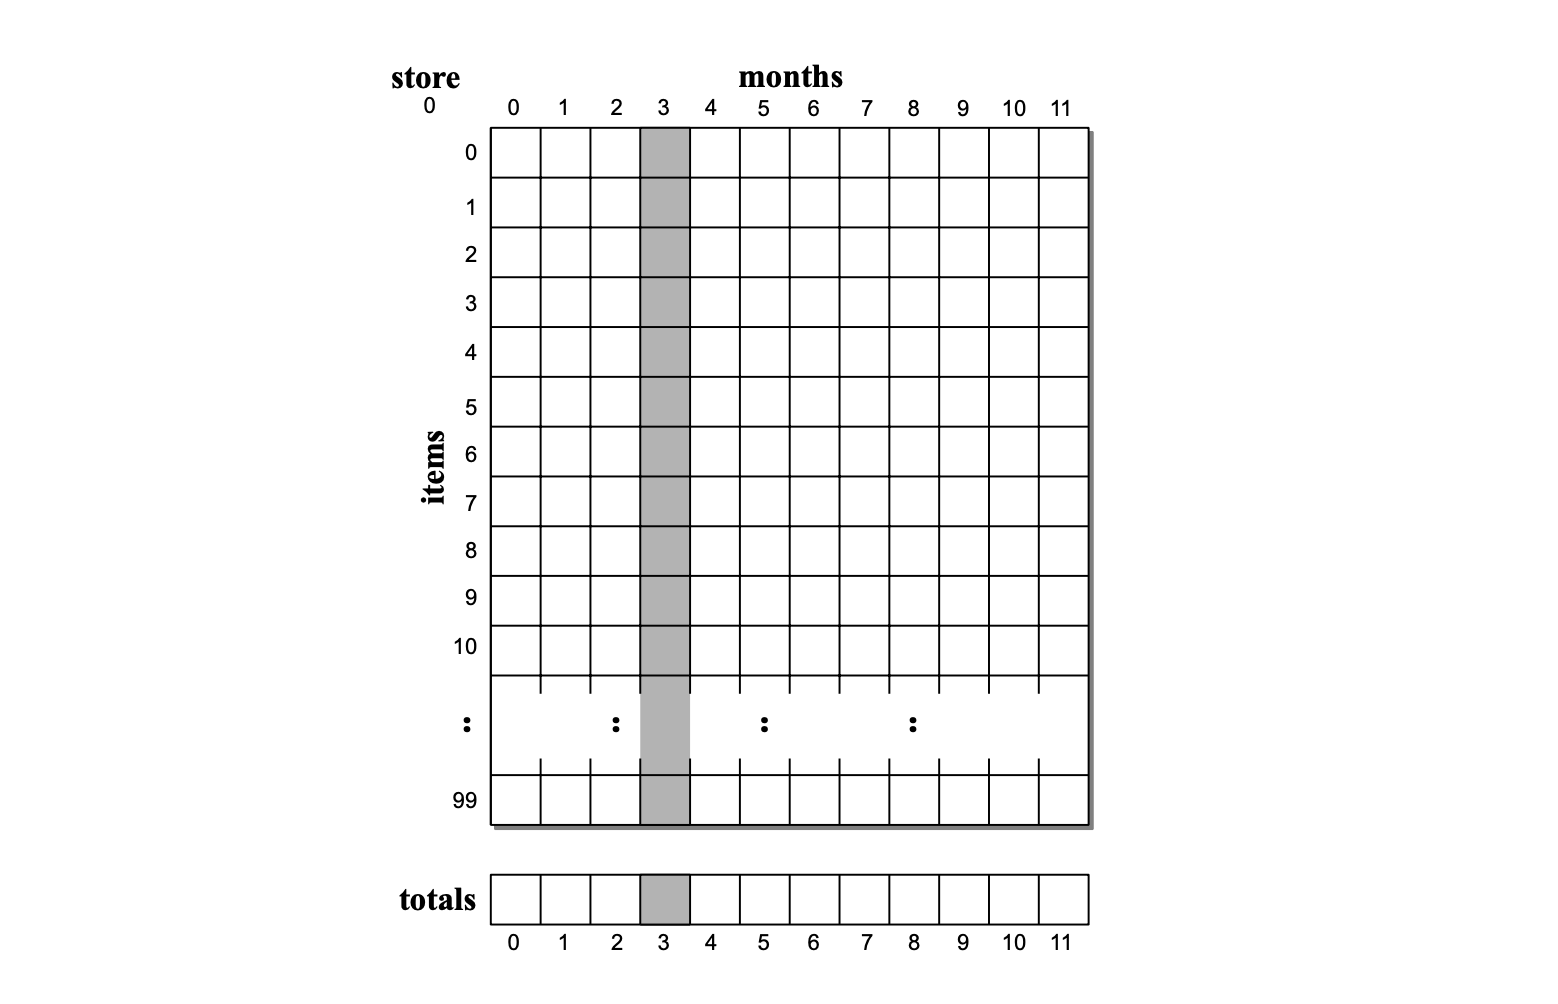

In [17]:
# Compute the total sales per month for a given store. A 1-D array is
# retured that contains the totals for each month

def totalSalesPerMonth( salesData, store ):
    # The store number must be offset by 1
    s = store - 1
    
    # The totals will be returned on a 1-D array
    totals = Array(12)
    
    # Iterate over the sales of each month
    for m in range(salesData.length(3)):
        sum = 0.0
        
        # Iterate over the sales of each item sold during the m month
        for i in range(saleData.length(2)):
            sum += saleData[s, i, m]
        
        # store the result in the corresponding month of the totals array
        totals[m] = sum
        
    return totals

In [18]:
%%bash
git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   chapter_1_ADT.ipynb
	modified:   chapter_2_array.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	chapter_3_set_maps_multiD_array.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
%%bash
git add "chapter_3_set_maps_mult"